### Load Data

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from IPython.display import display

In [18]:
calendar = pd.read_csv('./data/calendar.csv')
prices = pd.read_csv('./data/sell_prices.csv')
sales = pd.read_csv('./data/sales_train_validation.csv')

sample = pd.read_csv('./data/sample_submission.csv')

In [27]:
display(calendar.head())
display(prices.head())
display(sales.head())

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


### EDA

In [4]:
calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [5]:
prices.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


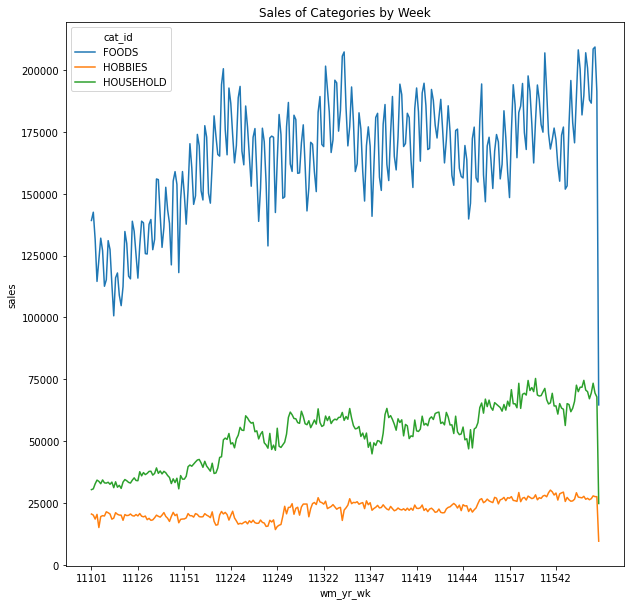

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))

tmp = sales.copy()
sales_counts = [col for col in tmp.columns if re.search('d_\d+', col)]

tmp = tmp.loc[:, ['cat_id'] + sales_counts]
tmp = tmp.groupby(['cat_id']).sum().reset_index()
tmp = tmp.melt(id_vars=['cat_id'], var_name='day', value_name='sales')
tmp = tmp.merge(calendar.astype(str).loc[:, ['d', 'wm_yr_wk']], left_on='day', right_on='d')
tmp = tmp.groupby(['cat_id', 'wm_yr_wk']).sum().reset_index()

_ = sns.lineplot(x='wm_yr_wk', y='sales', data=tmp.dropna(), hue='cat_id', ax=ax)
plt.title('Sales of Categories by Week')
_ = plt.xticks([x for i, x in enumerate(tmp.wm_yr_wk.astype(str).unique().tolist()) if i%25==0])

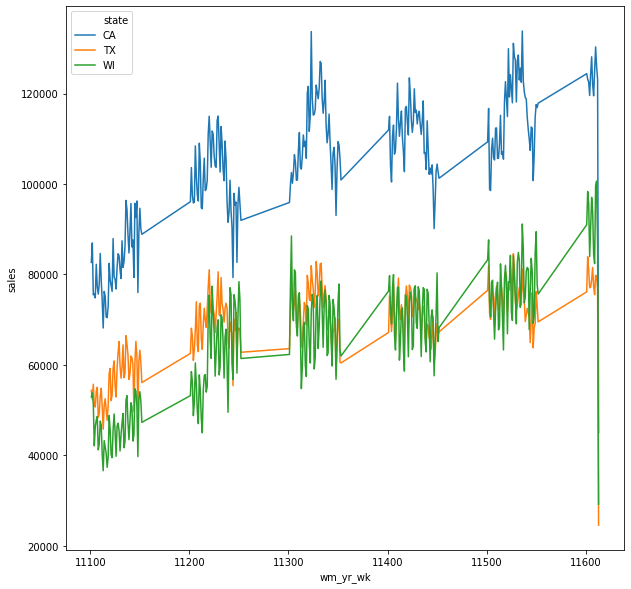

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))

tmp = sales.copy()
sales_cols = [col for col in tmp if re.search('d_\d+', col)]
tmp['state'] = tmp.id.map(lambda x: re.findall('CA|WI|TX', x)[0])
tmp = tmp.groupby('state')[sales_cols].sum().reset_index()
tmp = tmp.melt(id_vars='state', value_name='sales', var_name='day')
tmp = tmp.merge(calendar.loc[:, ['d', 'wm_yr_wk']], left_on='day', right_on='d')
tmp = tmp.groupby(['state', 'wm_yr_wk']).sum().reset_index()

_ = sns.lineplot(x='wm_yr_wk', y='sales', data=tmp, hue='state', ax=ax)
plt.title('Sales by State by Week')

In [123]:
def sales_dist_by_cate_gen(cat_ids, df):
    sales_cols = [col for col in df.columns if (re.search('d_\d+', col)) or (col == 'cat_id')]
    for cat in cat_ids:
        fig, ax = plt.subplots(figsize=(10, 10))
        tmp = df.copy()
        tmp = tmp.loc[df.cat_id == cat, sales_cols]
        tmp = tmp.melt(id_vars='cat_id', var_name='day', value_name='sales')
        tmp = tmp[tmp.sales != 0]
        stats = tmp.describe()
        
        _ = sns.distplot(tmp.sales.dropna(), ax=ax)
        plt.title(f'Daily Sales distribution of {cat}')
        
        yield stats

In [124]:
cat_ids = sales.cat_id.unique().tolist()

In [125]:
x = sales_dist_by_cate_gen(cat_ids, sales)

,sales
count,2.455673e+06
mean,2.494143e+00
std,3.667329e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,2.940000e+02


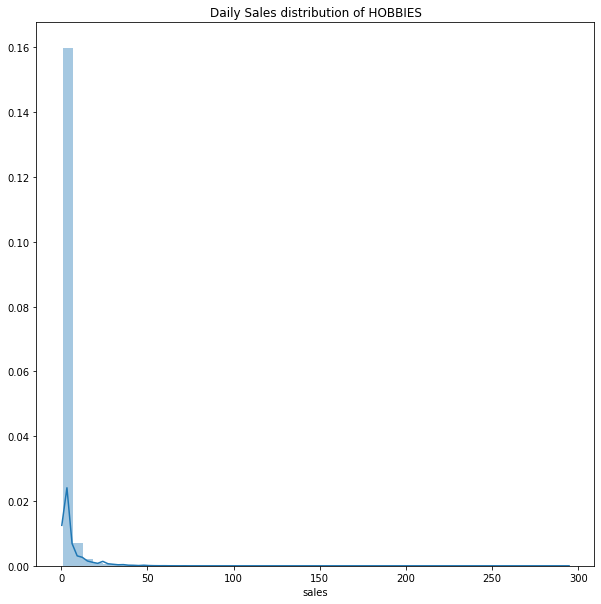

In [126]:
next(x)

,sales
count,5.654304e+06
mean,2.561000e+00
std,3.273012e+00
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,3.000000e+00
max,6.260000e+02


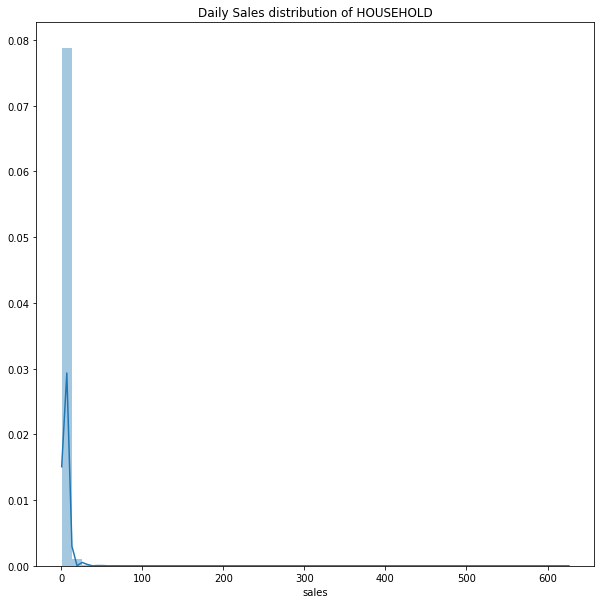

In [127]:
next(x)

,sales
count,1.044030e+07
mean,4.318836e+00
std,7.632905e+00
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,7.630000e+02


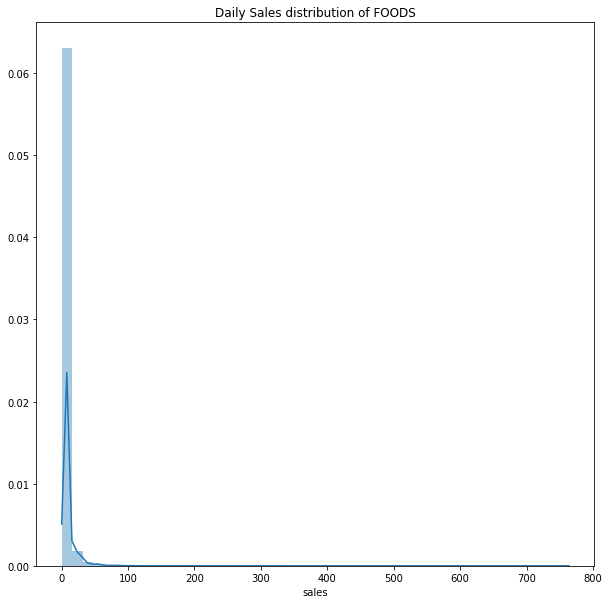

In [128]:
next(x)

### Feature Engineering

In [13]:
x = pd.read_csv('./data/sample_submission.csv')

In [17]:
calendar.snap_CA.value_counts(dropna=False)

0    1319
1     650
Name: snap_CA, dtype: int64